
# Fundamentals of Deep Learning

*Notebook 1.1: Hands-On with the Pereceptron*

In [6]:
"""
The MIT License (MIT)
Copyright (c) 2021 NVIDIA
Permission is hereby granted, free of charge, to any person obtaining a copy of
this software and associated documentation files (the "Software"), to deal in
the Software without restriction, including without limitation the rights to
use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
the Software, and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""


'\nThe MIT License (MIT)\nCopyright (c) 2021 NVIDIA\nPermission is hereby granted, free of charge, to any person obtaining a copy of\nthis software and associated documentation files (the "Software"), to deal in\nthe Software without restriction, including without limitation the rights to\nuse, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of\nthe Software, and to permit persons to whom the Software is furnished to do so,\nsubject to the following conditions:\nThe above copyright notice and this permission notice shall be included in all\ncopies or substantial portions of the Software.\nTHE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\nIMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS\nFOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR\nCOPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER\nIN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OU

This code example implements the perceptron learning algorithm and demonstrates how to use it to learn the not AND function. Code modified from Magnus Ekman.


Import a library for randomization and then initialize variables for the training examples and perceptron weights.


In [7]:
import random

def show_learning(w):
    print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1],
          ', w2 =', '%5.2f' % w[2])

# Define variables needed to control training process.
random.seed(7) # To make repeatable
LEARNING_RATE = 0.1
index_list = [0, 1, 2, 3] # Used to randomize order

# Define training examples.
x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0),
    (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)] # Inputs
y_train = [1.0, 1.0, 1.0, -1.0] # Output (ground truth)

# Define perceptron weights.
w = [0.2, -0.6, 0.25] # Initialize to some "random" numbers

Plot the perceptron weights using a graphical representation.  Will be called later in the main function as the algorithm learns the proper weights.

In [8]:
#show_learning(w)
import matplotlib.pyplot as plt
import random

# Define variables needed for plotting.
color_list = ['r-', 'm-', 'y-', 'c-', 'b-', 'g-']
color_index = 0
def show_learning(w):
    global color_index
    print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1],
          ', w2 =', '%5.2f' % w[2])
    if color_index == 0:
        plt.plot([1.0], [1.0], 'b_', markersize=12)
        plt.plot([-1.0, 1.0, -1.0], [1.0, -1.0, -1.0],
                 'r+', markersize=12)
        plt.axis([-2, 2, -2, 2])
        plt.xlabel('x1')
        plt.ylabel('x2')
    x = [-2.0, 2.0]
    if abs(w[2]) < 1e-5:
        y = [-w[1]/(1e-5)*(-2.0)+(-w[0]/(1e-5)),
             -w[1]/(1e-5)*(2.0)+(-w[0]/(1e-5))]
    else:
        y = [-w[1]/w[2]*(-2.0)+(-w[0]/w[2]),
             -w[1]/w[2]*(2.0)+(-w[0]/w[2])]
    plt.plot(x, y, color_list[color_index])
    if color_index < (len(color_list) - 1):
        color_index += 1

Note how each input example consists of three values, but the first value is always 1.0 because it is the bias term. The next code snippet states the perceptron output computation.


In [9]:
# First element in vector x must be 1.
# Length of w and x must be n+1 for neuron with n inputs.
def compute_output(w, x):
    z = 0.0
    for i in range(len(w)):
        z += x[i] * w[i] # Compute sum of weighted inputs
    if z < 0: # Apply sign function
        return -1
    else:
        return 1

The final code snippet contains the perceptron training loop. It is a nested loop in which the inner loop runs through all four training examples in random order. For each example, it computes the output and adjusts and prints the weights if the output is wrong. The outer loop tests whether the perceptron provided correct output for all four examples and, if so, terminates the program.


w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.05
w0 =  0.30 , w1 = -0.50 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.15


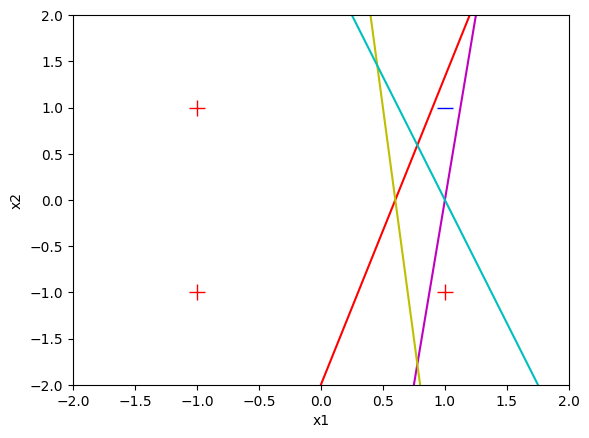

In [10]:
# Perceptron training loop.
all_correct = False
while not all_correct:
    all_correct = True
    random.shuffle(index_list) # Randomize order
    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w, x) # Perceptron function
        if y != p_out: # Update weights when wrong
            for j in range(0, len(w)):
                w[j] += (y * LEARNING_RATE * x[j])
            all_correct = False
            show_learning(w) # Show updated weights

### Same code for OR function

w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.25
w0 =  0.30 , w1 = -0.30 , w2 =  0.35
w0 =  0.40 , w1 = -0.20 , w2 =  0.25
w0 =  0.30 , w1 = -0.10 , w2 =  0.35
w0 =  0.40 , w1 = -0.00 , w2 =  0.25
w0 =  0.30 , w1 =  0.10 , w2 =  0.35


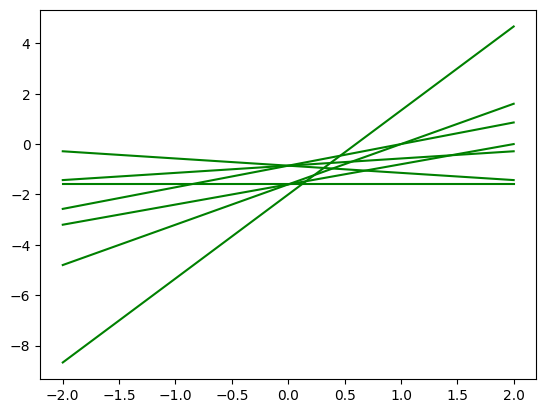

In [13]:
# Define training examples for the OR function.
x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0), (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)]  # Inputs
y_train = [-1.0, 1.0, 1.0, 1.0]  # Output for the OR function

# Define perceptron weights.
w = [0.2, -0.6, 0.25] # Initialize to some "random" numbers

def compute_output(w, x):
    z = 0.0
    for i in range(len(w)):
        z += x[i] * w[i]  # Compute sum of weighted inputs
    if z < 0:
        return -1.0
    else:
        return 1.0


# Perceptron training loop.
all_correct = False
while not all_correct:
    all_correct = True
    random.shuffle(index_list) # Randomize order
    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w, x) # Perceptron function
        if y != p_out: # Update weights when wrong
            for j in range(0, len(w)):
                w[j] += (y * LEARNING_RATE * x[j])
            all_correct = False
            show_learning(w) # Show updated weights